Survival probability analysis with derivatives

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (if not already loaded)
df = pd.read_csv("titanic.csv")

ModuleNotFoundError: No module named 'pandas'

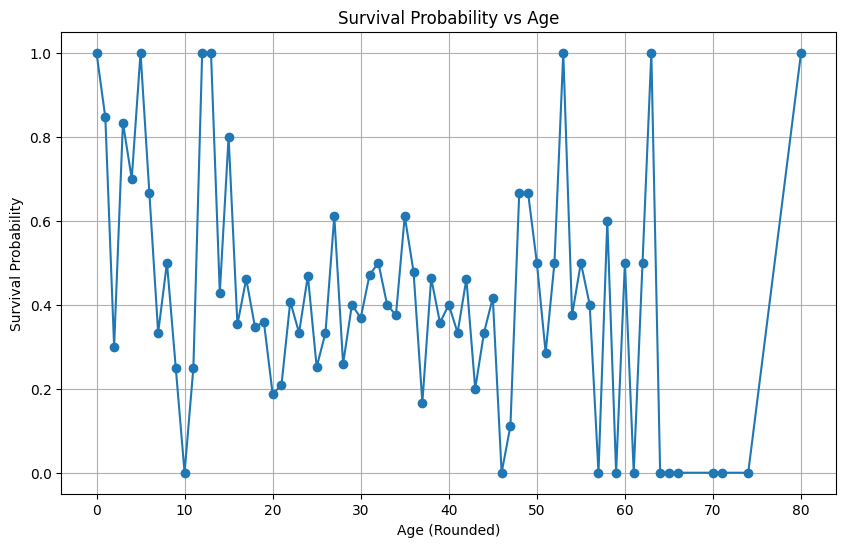

In [12]:
# Fill missing Age values (using Pclass-based mean from Day 2)
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda group: group.fillna(group.mean()))

# Round Age to nearest integer and group by Age
df["Age_rounded"] = df["Age"].round()
survival_by_age = df.groupby("Age_rounded")["Survived"].mean().reset_index()

# sort by Age for smooth derivative calculation 
survival_by_age = survival_by_age.sort_values("Age_rounded")

# plot survival probability vs age
plt.figure(figsize=(10, 6))
plt.plot(survival_by_age["Age_rounded"], survival_by_age["Survived"], marker="o")
plt.title("Survival Probability vs Age")
plt.xlabel("Age (Rounded)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

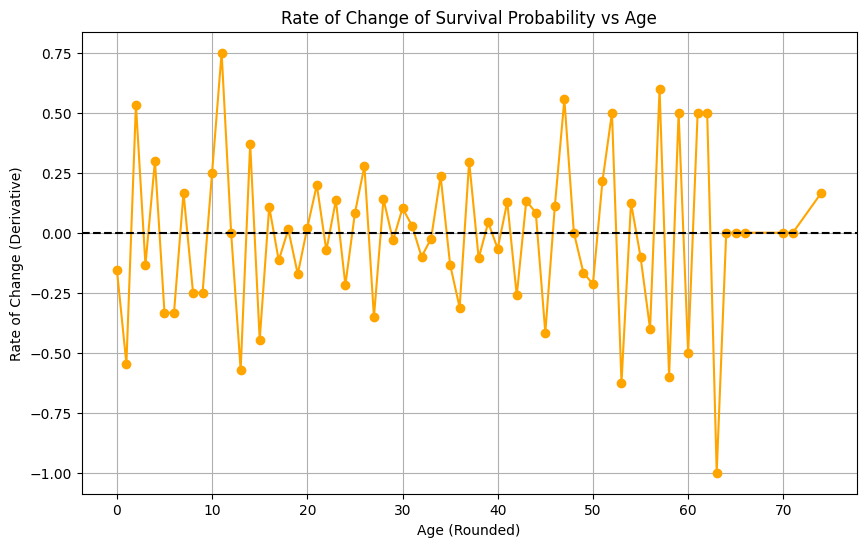

In [13]:
# Calculate the derivative using finite difference
ages = survival_by_age["Age_rounded"].values
probs = survival_by_age["Survived"].values

# finite diffrence: (f(x+h) - f(x)) / h, where h=1 (difference between consecutive ages)
derivative = np.diff(probs) / np.diff(ages)
derivative_ages = ages[:-1]  # Derivative is calculated between points, so we lose one point

# Plot the derivative
plt.figure(figsize=(10, 6))
plt.plot(derivative_ages, derivative, marker="o", color="orange")
plt.title("Rate of Change of Survival Probability vs Age")
plt.xlabel("Age (Rounded)")
plt.ylabel("Rate of Change (Derivative)")
plt.grid(True)
plt.axhline(0, color="black", linestyle="--")  # Add a zero line for reference
plt.show()

Iteration 0, Loss: 0.2572
Iteration 100, Loss: 0.1578
Iteration 200, Loss: 0.1569
Iteration 300, Loss: 0.1561
Iteration 400, Loss: 0.1552
Iteration 500, Loss: 0.1543
Iteration 600, Loss: 0.1535
Iteration 700, Loss: 0.1526
Iteration 800, Loss: 0.1518
Iteration 900, Loss: 0.1509

Final w: 0.0070, Final b: 0.0295


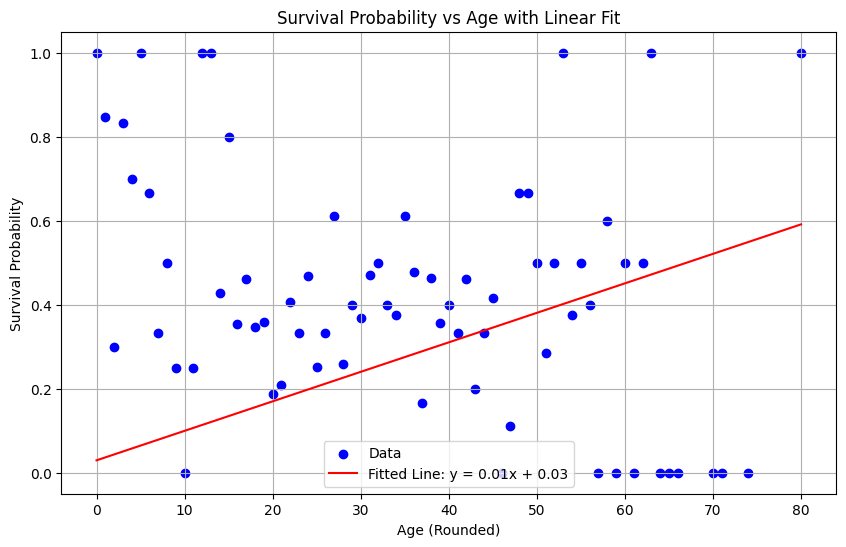

In [17]:
# Prepare data for gradient descent
X = survival_by_age["Age_rounded"].values  # Input (Age)
y = survival_by_age["Survived"].values     # Target (Survival Probability)

# Initialize parameters
w = 0.0  # Initial weight
b = 0.0  # Initial bias
learning_rate = 0.0001  # Small learning rate due to data scale
n_iterations = 1000     # Number of iterations

# Gradient Descent
n = len(X)
for iteration in range(n_iterations):
    # Forward pass: predict survival probability
    y_pred = w * X + b
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y) ** 2)
    
    # Compute gradients (derivatives of loss with respect to w and b)
    dw = (2/n) * np.sum((y_pred - y) * X)  # Derivative w.r.t w
    db = (2/n) * np.sum(y_pred - y)        # Derivative w.r.t b
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Print loss every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}, Loss: {loss:.4f}")

# Print final parameters
print(f"\nFinal w: {w:.4f}, Final b: {b:.4f}")

# Plot the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, w * X + b, color="red", label=f"Fitted Line: y = {w:.2f}x + {b:.2f}")
plt.title("Survival Probability vs Age with Linear Fit")
plt.xlabel("Age (Rounded)")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()